In [1]:
%pylab inline
import glidertools as gt
import process_seaglider_data_L1 as ps

Populating the interactive namespace from numpy and matplotlib


Load glider data

In [2]:
%run read_saz_glider_data.py


DIMENSION: ctd_data_point
{ctd_depth, ctd_time, longitude, ctd_pressure, salinity_raw, temperature, latitude}


100%|██████████| 485/485 [00:06<00:00, 69.60it/s]


/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/SG542_SAZ_2019/p5420082.nc was skipped


Cannot merge data - not enough time indexed DataFrames
Returning unmerged dataframes


In [3]:
dat_saz.to_netcdf('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/sg542_saz_L0.nc')

/Users/marcel/anaconda3/lib/python3.7/site-packages/glidertools/cleaning.py:401: MatplotlibDeprecationWarning: 
The get_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.get_clim instead.
  cx = pn(r_[cb.get_clim(), min_count])[-1]


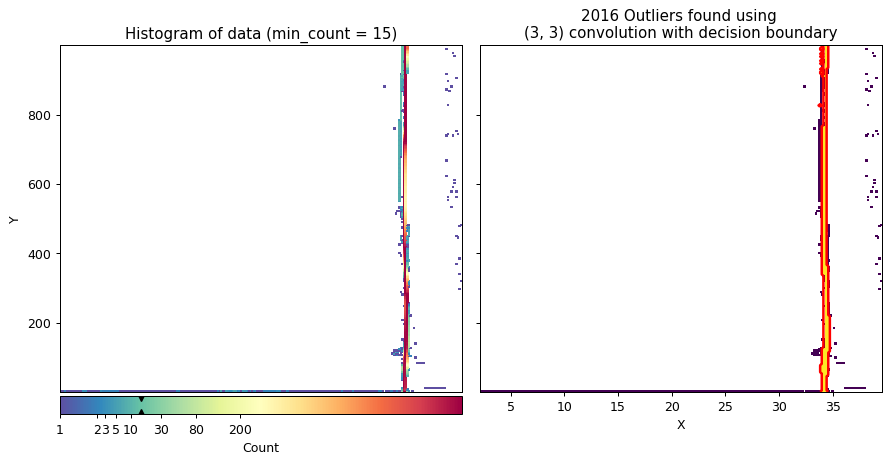

In [4]:
mask, fig = gt.cleaning.data_density_filter(dat_saz.salinity, dat_saz.ctd_depth, min_count=15, conv_matrix=[3,3])
dat_saz.salinity[mask] = np.NaN
dat_saz.temperature[mask] = np.NaN

In [5]:
dat_saz_L1 = ps.process_seaglider_data_L1(dat_saz)

Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.64
Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.64
Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.64
Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.64
Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.64


In [6]:
dat_saz_L1.to_netcdf('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/sg542_saz_L1.nc')

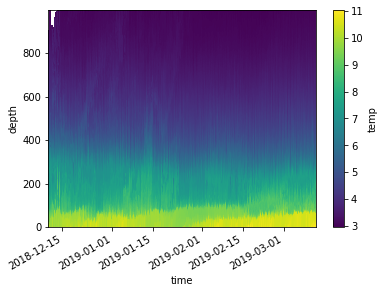

In [7]:
dat_saz_L1.temp.plot.pcolormesh()